In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Objective: Predict employee turnover based in satisfaction in the workplace

In [2]:
path='Modulo_3/HR_comma_sep.csv'
file=os.path.join(path)
df_original=pd.read_csv(file)
df=df_original.copy()

First we need to see a sample and size of the data to understand it

In [3]:
print(df.sample(5)) #sample
print('==================================================================')
print('shape of data =', df.shape) #data shape

       satisfaction_level  last_evaluation  number_project  \
6492                 0.64             0.57               4   
5442                 0.16             0.70               5   
509                  0.37             0.57               2   
9390                 0.66             0.57               4   
14615                0.76             0.87               5   

       average_montly_hours  time_spend_company  Work_accident  left  \
6492                    217                   3              0     0   
5442                    257                   4              0     0   
509                     155                   3              0     1   
9390                    220                   2              1     0   
14615                   245                   5              0     1   

       promotion_last_5years      sales  salary  
6492                       0  marketing    high  
5442                       0      sales  medium  
509                        0    support     

# 1.	Perform data quality checks by checking for missing values, if any

In [4]:
print(df.info())
#general dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [5]:
df.isna().sum() #sum missing values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

all information is complete. There isn't any missing values. Shape of data is (14999,10) and values are float, int, and object as one can see in the above information.

# 2.	Understand what factors contributed most to employee turnover at EDA.

In [6]:
df.describe() # describe basic statistical data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


satisfacion is aprox 61%, suggesting that it needs attention. Most employees have arounf 4 projects, where they work approx 201 +- 50  hours (7-8+ hours per day) 23.8 % of employees left the company. Promotion in 5 years is very little 2.1% of chances of geting a promotion. Most employees stay 3.5 in the company 

* Now we will find correlated data. Therefore we will make the salary (low,medium,high) numerical as follows (low=-1,medium=0,high=1)

In [7]:
# changing low, medium, high to numerical values
df['salary'] = df['salary'].map({'low': -1, 'medium': 0, 'high': 1})
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,-1
1,0.80,0.86,5,262,6,0,1,0,sales,0
2,0.11,0.88,7,272,4,0,1,0,sales,0
3,0.72,0.87,5,223,5,0,1,0,sales,-1
4,0.37,0.52,2,159,3,0,1,0,sales,-1


In [8]:
df_filtered = df.drop(columns=['sales'])
df_filtered.head() #checking that data has been added correctly

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,-1
1,0.80,0.86,5,262,6,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,-1
4,0.37,0.52,2,159,3,0,1,0,-1


The following heatmap determines the correlated data

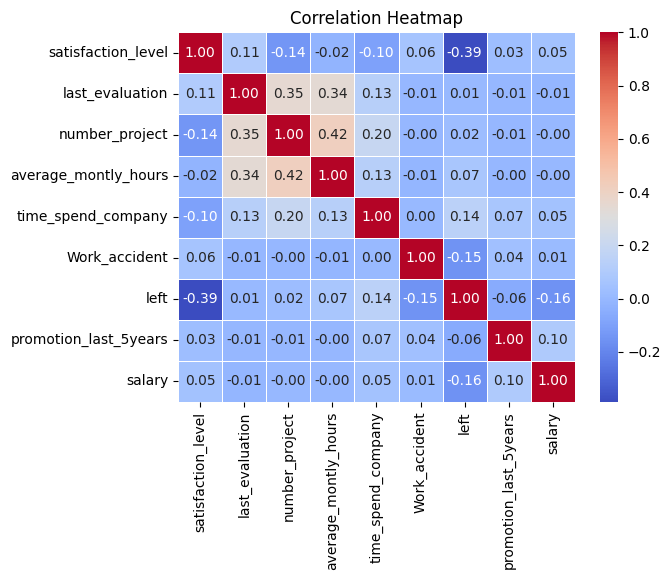

In [9]:
filtered_corr=df_filtered.corr()#obtaining correlation
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)#creating a heatmap
plt.title("Correlation Heatmap")
plt.show()

Note:  
- negative linear relationship = as one variable increases, the other usually decreases in a fairly consistent way (or viceversa).
- positive linear relationship = as one variable increases, the other increases as well. 

Important and relevant tendencies seen from the HeatMap:
--------------------------------------------------------
Turnover (left) Correlations:

- satisfaction_level: (−0.39) Strongest negative correlation. Lower satisfaction is strongly associated with higher turnover.
  
- salary: −0.16 Employees with lower salaries are somewhat more likely to leave.

- time_spend_company: (+0.14) Slightly positive correlation. Longer tenure may increase the chance of leaving, possibly due to stagnation or burnout.

- work_accident: (−0.15) Employees who have experienced accidents are slightly less likely to leave, possibly due to job security factors.

- promotion_last_5years: (−0.06) Lack of promotion slightly increases the probability of turnover.

- average_monthly_hours: (+0.07) Weak positive correlation; working longer hours might slightly contribute to leaving.

- last_evaluation: (+0.01), number_project: (+0.02) No significant correlation with turnover.

Workload and Productivity Patterns:

-	number_project vs average_monthly_hours: (+0.42) Employees with more projects work significantly more hours.

-	last_evaluation vs average_monthly_hours: (+0.34) Better-rated employees tend to work longer hours.

-	number_project vs last_evaluation: (+0.35) Employees with more projects also receive higher evaluations.

Satisfaction Drivers

-	number_project vs satisfaction_level: −0.14 A higher number of projects slightly reduces satisfaction.

-	time_spend_company vs satisfaction_level: −0.10 Longer time at the company slightly lowers satisfaction.

⸻


Conclusion
----------
Satisfaction is the most influential reason why employees leave. Many factors may add towards a negative satisfaction. It is clear that low salarie, few promotions, many projects, longer hours encapsulates satisfaction. As well it can be seen that better reviews are correlated with more projects and more working hours, but salaries are not better, nor promotion. 

Now we will explore which jobs have the worst satisfaction

In [10]:
df[['sales']].value_counts() #exploring job positions

sales      
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [11]:
df[['sales','satisfaction_level']].value_counts()

sales        satisfaction_level
sales        0.11                  92
             0.10                  87
             0.78                  82
technical    0.10                  79
sales        0.73                  77
                                   ..
hr           0.18                   1
             0.25                   1
product_mng  0.26                   1
marketing    0.12                   1
product_mng  0.33                   1
Name: count, Length: 900, dtype: int64

In [12]:
df_ss_counts = df[['sales','salary']].value_counts().reset_index()
pivot=df_ss_counts.pivot(index='sales', columns='salary')
print(pivot)

            count           
salary         -1     0    1
sales                       
IT            609   535   83
RandD         364   372   51
accounting    358   335   74
hr            335   359   45
management    180   225  225
marketing     402   376   80
product_mng   451   383   68
sales        2099  1772  269
support      1146   942  141
technical    1372  1147  201


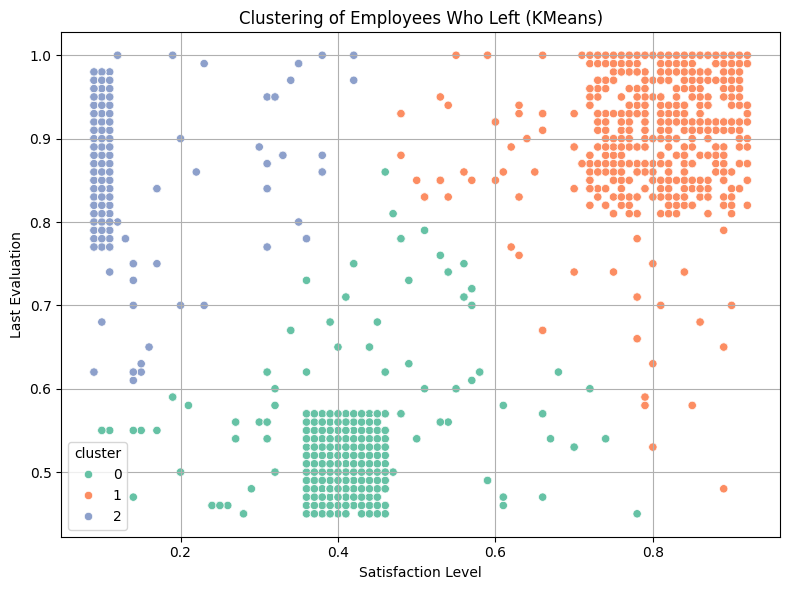

In [13]:
from sklearn.cluster import KMeans

# Filter only employees who left the company
left_employees = df[df['left'] == 1].copy()

# Select relevant features for clustering
X_cluster = left_employees[['satisfaction_level', 'last_evaluation']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
left_employees['cluster'] = kmeans.fit_predict(X_cluster)

# Plot the result
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=left_employees,
    x='satisfaction_level',
    y='last_evaluation',
    hue='cluster',
    palette='Set2'
)
plt.title('Clustering of Employees Who Left (KMeans)')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4.	Handle the left Class Imbalance using the SMOTE technique.

In [14]:
from imblearn.over_sampling import SMOTE


# Prepare data for SMOTE and model training
X = df.drop(columns=['left'])  # Features
y = df['left']                 # Target

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)


5.	Perform k-fold cross-validation model training and evaluate performance.

6.	Identify the best model and justify the evaluation metrics used

In [15]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5)}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Evaluate each model
for name, model in models.items():
    scores = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
    print(f"{name}: Accuracy = {scores.mean():.4f} ± {scores.std():.4f}")



Logistic Regression: Accuracy = 0.7862 ± 0.0059
Random Forest: Accuracy = 0.9864 ± 0.0007
SVM: Accuracy = 0.6993 ± 0.0046
KNN: Accuracy = 0.9504 ± 0.0024


we can see that the best model is when we use random forest. So we will implement that model. 

In [17]:
# Final model: Random Forest
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_resampled, y_resampled)
y_pred = best_model.predict(X_resampled)

print("\nFinal Evaluation on Resampled Data:")
print(classification_report(y_resampled, y_pred))
print(confusion_matrix(y_resampled, y_pred))


Final Evaluation on Resampled Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11428
           1       1.00      1.00      1.00     11428

    accuracy                           1.00     22856
   macro avg       1.00      1.00      1.00     22856
weighted avg       1.00      1.00      1.00     22856

[[11428     0]
 [    0 11428]]


Since employee turnover prediction is a binary classification problem, these metrics (accuracy, precision, recall, F1-score, confusion matrix) are standard, justified, and informative. Moreover, as data is now balanced, the accuracy is not misleading and gives correct measurement. 

# 7.	Suggest various retention strategies for targeted employees


To reduce employee turnover, high-performing yet dissatisfied employees should receive career development plans, recognition, and advancement opportunities. Underperforming and dissatisfied staff may benefit from coaching and better role alignment. Competitive compensation and balanced workloads should be ensured. Predictive models can help identify at-risk employees early. A healthy, inclusive work culture and internal mobility also support long-term retention.

	•	Offer career growth opportunities through training, mentoring, and clear promotion paths.
	•	Improve employee recognition by acknowledging achievements and providing regular positive feedback.
	•	Enhance compensation and benefits to stay competitive and reflect employee value.
	•	Promote work-life balance with flexible hours, manageable workloads, and mental health support.
	•	Foster a positive work culture that emphasizes inclusion, purpose, and strong team dynamics.

In [34]:
import pandas as pd

#example that works for an employee that for sure will quit
# Raw new employee input
new_employee_raw = pd.DataFrame([{
'satisfaction_level': 0.1,
'last_evaluation': 0.95,
'number_project': 6,
'average_montly_hours': 260,
'time_spend_company': 5,
'Work_accident': 0,
'promotion_last_5years': 0,
'sales': 'support',
'salary': 'low'
}])

# Apply same encoding as used during training
new_employee_encoded = pd.get_dummies(new_employee_raw, drop_first=True)

# Match model’s expected input columns (fill missing columns with 0)
for col in X_encoded.columns:  # X_encoded = your training data after get_dummies
    if col not in new_employee_encoded.columns:
        new_employee_encoded[col] = 0

# Reorder columns to match the training set
new_employee_encoded = new_employee_encoded[X_encoded.columns]

# Predict
prediction = best_model.predict(new_employee_encoded)
print("Predicted class (0 = Stay, 1 = Leave):", prediction[0])

Predicted class (0 = Stay, 1 = Leave): 1


In [33]:
import pandas as pd

#example for employee that for sure will stay
# Raw new employee input
new_employee_raw = pd.DataFrame([{
    'satisfaction_level': 0.90,
    'last_evaluation': 0.90,
    'number_project': 3,
    'average_montly_hours': 190,
    'time_spend_company': 3,
    'Work_accident': 0,
    'promotion_last_5years': 1,
    'sales': 'IT',
    'salary': 'medium'
}])

# Apply same encoding as used during training
new_employee_encoded = pd.get_dummies(new_employee_raw, drop_first=True)

# Match model’s expected input columns (fill missing columns with 0)
for col in X_encoded.columns:  # X_encoded = your training data after get_dummies
    if col not in new_employee_encoded.columns:
        new_employee_encoded[col] = 0

# Reorder columns to match the training set
new_employee_encoded = new_employee_encoded[X_encoded.columns]

# Predict
prediction = best_model.predict(new_employee_encoded)
print("Predicted class (0 = Stay, 1 = Leave):", prediction[0])

Predicted class (0 = Stay, 1 = Leave): 0
